# Assignment 2
## Neural Networks
## PGCP DSML IITR-TimesPro
### Submitted by - Sylvia Chadha

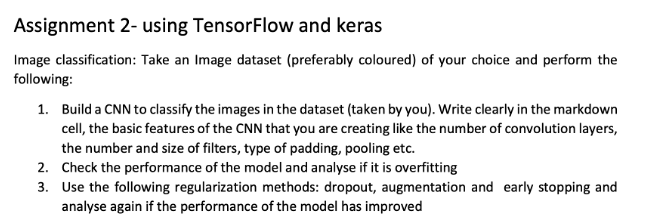

## Contents
    
- Exploring Data
- Preprocessing Data
- Image Classification 
- Overfitting
- Regularization Methods 
- Evaluation 
- Comparing Original vs Regularised model

## Exploring Data

**Import Libraries**

In [1]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

**Load Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


**Shape of dataset**

In [3]:
print(x_train.shape, y_train.shape)


(50000, 32, 32, 3) (50000, 1)


In [4]:
print(x_test.shape, y_test.shape)


(10000, 32, 32, 3) (10000, 1)


**Target names**

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.flatten()
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:



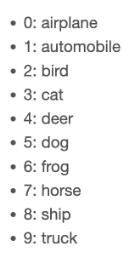

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

**Plot images from dataset**

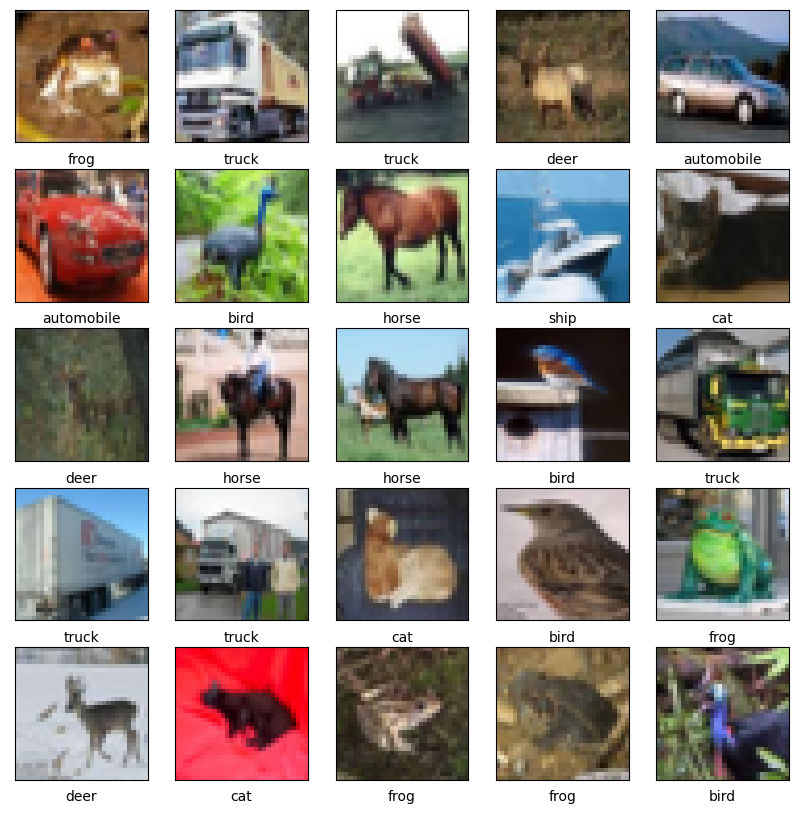

In [8]:
# We randomly see few pictures from the dataset

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])  # train_labels[i] will be integer coded label
plt.show()

## Pre-Processing Data

1. Size
2. Dimensions
3. Normalization
4. Encoding

**Size** - For Cifar dataset all 32x32 colored images.

In [9]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

**Dimensions** - 3-Dimensional images; colored images, no formatting required accepted by CNN as it is.

**Normalization** - The data is in an int8 format, so before feed it into the network convert its type to change to float32, and also rescale the pixel values in range 0 - 1 inclusive i.e. perform normalization of data.


In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.

**Encoding** - One-hot encoding integer labels can be done which can be helpful while modelling.


In [11]:
from tensorflow.keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
y_train_ohe = to_categorical(y_train, num_classes = 10)
y_test_ohe = to_categorical(y_test, num_classes = 10)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_ohe[0])

Original label: 6
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Image Classification

In [12]:
import tensorflow
from tensorflow.keras.models import Sequential            ## Building architecture
from tensorflow.keras.layers import Conv2D, MaxPooling2D  ## Main CNN layers
from tensorflow.keras.layers import Dense, Flatten        ## For fully connected n/w
from tensorflow.keras.layers import ReLU,LeakyReLU        ## Activation function

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train_ohe, y_valid = train_test_split(x_train, y_train_ohe, test_size=0.2, random_state=13)

x_train.shape, x_valid.shape, y_train_ohe.shape, y_valid.shape


((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

### Building Architecture

1. We build a `Sequential model` of Keras.
2. We make use of `3 Convolution layers` with number of `filters as 32,64, 128` and kernel size of `(3,3)`.
3. Activation function used is `Relu` in all layers except the output layer where we use `softmax` as it is a multi-class classification problem.
4. `Maxpooling of (2,2`) is applied which reduces size of image/ feature maps by half.
3. Default `stride of (1,1)`is used i.e. moving over every row and column.
4. `Padding = same` so size of feature maps is not reduced when we apply convolulation operation.


In [14]:
num_classes=10

In [15]:
cifar_model = Sequential()

## FEATURE EXTRACTION PART
## 1st Conv layer (including pooling)
cifar_model.add(Conv2D(filters=32, 
                         kernel_size=(3,3),
                         strides=(1,1),                #(vertical_stride, horizontal_stride)
                         padding='same',
                         input_shape=(32,32,3))) 

cifar_model.add(ReLU())                                 # Activation (introduce non-linearity)
cifar_model.add(MaxPooling2D((2, 2),padding='valid'))   # subsampling


## 2nd Conv layer (including pooling)
# Since sequential model, input to 2nd layer will be taken from 1st layer 

cifar_model.add(Conv2D(filters=64, 
                         kernel_size=(3, 3),
                         strides=(1,1),
                         padding='same'))

cifar_model.add(ReLU())
cifar_model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))

## 3rd Conv layer (including pooling)

cifar_model.add(Conv2D(filters=128, 
                         kernel_size=(3, 3),
                         strides=(1,1),
                         padding='same'))

cifar_model.add(ReLU())
cifar_model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))

## CLASSIFICATION PART

##Dense/ fully connected layer
cifar_model.add(Flatten())    # Input nodes

cifar_model.add(Dense(128))   # hidden layer 1
cifar_model.add(ReLU())       # Activation

cifar_model.add(Dense(num_classes, activation='softmax'))  # O/P with softmax


2023-04-03 11:35:31.604719: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
cifar_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 re_lu_1 (ReLU)              (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [17]:
import visualkeras

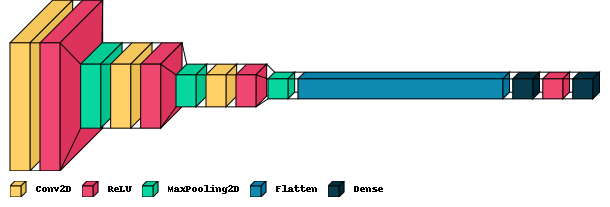

In [18]:
visualkeras.layered_view(cifar_model, legend=True) # without custom font
from PIL import ImageFont
visualkeras.layered_view(cifar_model, legend=True) 

### Compiling the model

In [19]:
cifar_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
                    optimizer=tensorflow.keras.optimizers.Adam(),
                    metrics=['accuracy'])

### Training the model

In [20]:
batch_size = 64
epoch_train = 25

In [21]:
cifar_train = cifar_model.fit(x_train, y_train_ohe, 
                              batch_size=batch_size, 
                              epochs=epoch_train, 
                              verbose=1, 
                              use_multiprocessing=True,
                              validation_data=(x_valid, y_valid))

Epoch 1/25
625/625 [==============================] - 26s 42ms/step - loss: 1.5086 - accuracy: 0.4546 - val_loss: 1.2221 - val_accuracy: 0.5640
Epoch 2/25
625/625 [==============================] - 26s 41ms/step - loss: 1.0753 - accuracy: 0.6208 - val_loss: 1.0122 - val_accuracy: 0.6448
Epoch 3/25
625/625 [==============================] - 25s 40ms/step - loss: 0.8956 - accuracy: 0.6874 - val_loss: 0.9074 - val_accuracy: 0.6812
Epoch 4/25
625/625 [==============================] - 26s 41ms/step - loss: 0.7835 - accuracy: 0.7267 - val_loss: 0.8396 - val_accuracy: 0.7130
Epoch 5/25
625/625 [==============================] - 26s 42ms/step - loss: 0.6906 - accuracy: 0.7577 - val_loss: 0.8317 - val_accuracy: 0.7164
Epoch 6/25
625/625 [==============================] - 26s 41ms/step - loss: 0.6075 - accuracy: 0.7901 - val_loss: 0.8301 - val_accuracy: 0.7210
Epoch 7/25
625/625 [==============================] - 26s 41ms/step - loss: 0.5349 - accuracy: 0.8116 - val_loss: 0.8155 - val_accuracy:

Model seems to be clearly overfitting.

In [22]:
#Save model
cifar_model.save("cifar_model.h5py");

INFO:tensorflow:Assets written to: cifar_model.h5py/assets


INFO:tensorflow:Assets written to: cifar_model.h5py/assets


In [ ]:
# Load saved model
# from tensorflow.keras.models import load_model

# cifar_model = load_model('cifar_model.h5py')


### Model Evaluation

In [23]:
test_eval = cifar_model.evaluate(x_test, y_test_ohe, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.9524625539779663
Test accuracy: 0.713699996471405


## Overfitting

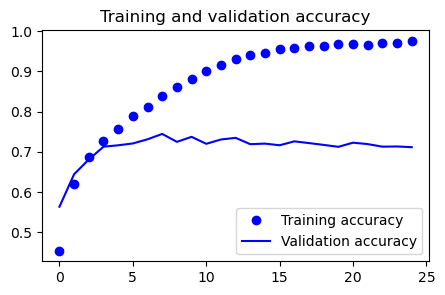

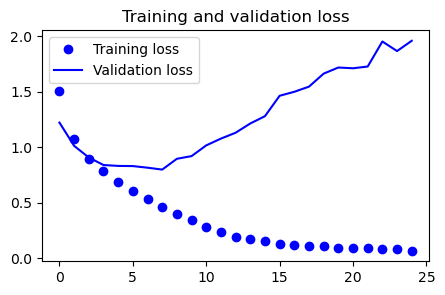

In [24]:
accuracy = cifar_train.history['accuracy']      # accesssing .history
val_accuracy = cifar_train.history['val_accuracy']
loss = cifar_train.history['loss']
val_loss = cifar_train.history['val_loss']

epochs = range(len(accuracy))
plt.figure(figsize=(5,3))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(figsize=(5,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show();

The curves above clearly shows model is overfitting as difference b/w train and validation accuracy is huge. Also same for the loss curve i.e. difference b/w train loss and validation loss is huge where validation loss first reduces then starts to increase again.

## Regularization - Dropout, Augmentation and Early Stopping.

In [46]:
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout


### Regularization1- Adding dropout layer to architecture

We add a `dropout of 0.25` b/w each convolution layer and also `dropout of 0.40` b/w dense layers to avoid overfitting.

In [47]:
cifar_model = Sequential()

## FEATURE EXTRACTION PART
## 1st Conv layer (including pooling)
cifar_model.add(Conv2D(filters=32, 
                         kernel_size=(3,3),
                         strides=(1,1),                #(vertical_stride, horizontal_stride)
                         padding='same',
                         input_shape=(32,32,3))) 

cifar_model.add(ReLU())                                 # Activation (introduce non-linearity)
cifar_model.add(MaxPooling2D((2, 2),padding='valid'))   # subsampling
cifar_model.add(Dropout(0.25))

## 2nd Conv layer (including pooling)
# Since sequential model, input to 2nd layer will be taken from 1st layer 

cifar_model.add(Conv2D(filters=64, 
                         kernel_size=(3, 3),
                         strides=(1,1),
                         padding='same'))

cifar_model.add(ReLU())
cifar_model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
cifar_model.add(Dropout(0.25))

## 3rd Conv layer (including pooling)

cifar_model.add(Conv2D(filters=128, 
                         kernel_size=(3, 3),
                         strides=(1,1),
                         padding='same'))

cifar_model.add(ReLU())
cifar_model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
cifar_model.add(Dropout(0.30))


## CLASSIFICATION PART

##Dense/ fully connected layer
cifar_model.add(Flatten())    # Input nodes

cifar_model.add(Dense(128))   # hidden layer 1
cifar_model.add(ReLU())       # Activation
cifar_model.add(Dropout(0.40))


cifar_model.add(Dense(num_classes, activation='softmax'))  # O/P with softmax

In [48]:
cifar_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 re_lu_16 (ReLU)             (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 re_lu_17 (ReLU)             (None, 16, 16, 64)        0         
                                                      

*Parameters for unregularized and regularized models are still the same becauseDropout only ignores some neurons.*

###  Regularization2 - Data Augmentation (Define ImageDataGenerator)

We use techniques like rotation_range, width_shift_range, height_shift_range, horizontal_flip and vertical_flip to add diversity to data to help model learn better.

In [49]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

###  Regularization3 - Early Stopping (Define the callbacks)

We use a patience of 10 and metrics as 'val_loss' for early stopping.

In [50]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10)
callbacks_list = [early_stop]

### Compile Model

In [51]:
cifar_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
                    optimizer=tensorflow.keras.optimizers.Adam(),
                    metrics=['accuracy'])

### Train Model

In [52]:
# We add regularizations i.e. droput, early-stop and data augmentation
# We increase the epochs from 25 to 50 

cifar_model_reg = cifar_model.fit(datagen.flow(x_train, y_train_ohe, 
                                                batch_size=batch_size),
                                                epochs=60,
                                                verbose=1, 
                                                #use_multiprocessing=True,  
                                                validation_data=(x_valid, y_valid),
                                                callbacks=callbacks_list)

Epoch 1/60
625/625 [==============================] - 29s 46ms/step - loss: 1.8021 - accuracy: 0.3380 - val_loss: 1.4447 - val_accuracy: 0.4666
Epoch 2/60
625/625 [==============================] - 29s 46ms/step - loss: 1.5033 - accuracy: 0.4546 - val_loss: 1.3246 - val_accuracy: 0.5207
Epoch 3/60
625/625 [==============================] - 29s 47ms/step - loss: 1.3611 - accuracy: 0.5088 - val_loss: 1.1413 - val_accuracy: 0.5922
Epoch 4/60
625/625 [==============================] - 29s 46ms/step - loss: 1.2785 - accuracy: 0.5428 - val_loss: 1.1316 - val_accuracy: 0.5966
Epoch 5/60
625/625 [==============================] - 28s 45ms/step - loss: 1.2169 - accuracy: 0.5669 - val_loss: 0.9969 - val_accuracy: 0.6437
Epoch 6/60
625/625 [==============================] - 28s 45ms/step - loss: 1.1640 - accuracy: 0.5882 - val_loss: 0.9493 - val_accuracy: 0.6632
Epoch 7/60
625/625 [==============================] - 28s 45ms/step - loss: 1.1336 - accuracy: 0.6016 - val_loss: 0.9650 - val_accuracy:

In [53]:
cifar_model.save("cifar_model_regularized.h5py");


INFO:tensorflow:Assets written to: cifar_model_regularized.h5py/assets


INFO:tensorflow:Assets written to: cifar_model_regularized.h5py/assets


## Evaluate using Classification report and Learning Curves

### Model Evaluation

In [54]:
test_eval_reg = cifar_model.evaluate(x_test, y_test_ohe, verbose=0)
print('Test loss:', test_eval_reg[0])
print('Test accuracy:', test_eval_reg[1])

Test loss: 0.7149581909179688
Test accuracy: 0.7540000081062317


### Learning Curves

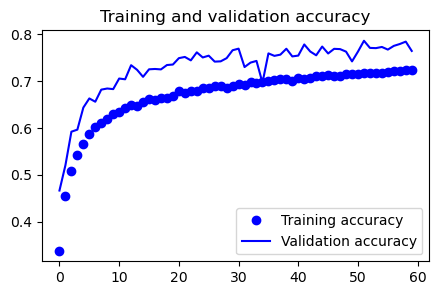

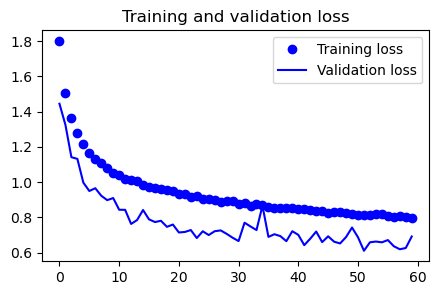

In [55]:
accuracy = cifar_model_reg.history['accuracy']      # accesssing .history
val_accuracy = cifar_model_reg.history['val_accuracy']
loss = cifar_model_reg.history['loss']
val_loss = cifar_model_reg.history['val_loss']

epochs = range(len(accuracy))
plt.figure(figsize=(5,3))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(figsize=(5,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show();

## Comparing Original Model with Regularized Model

**Qualitative Analysis**

- If we compare the graphs of Original model and the graphs shown above for regularized model we can see that for both loss as well as accuracy graphs, the training and validation curves are closer compared to unregularized model where there is huge gap b/w training and validation metrics thus implying a decrease in overfitting.

- The LHS graph show Original model and RHS graph shows after Regularization methods applied.

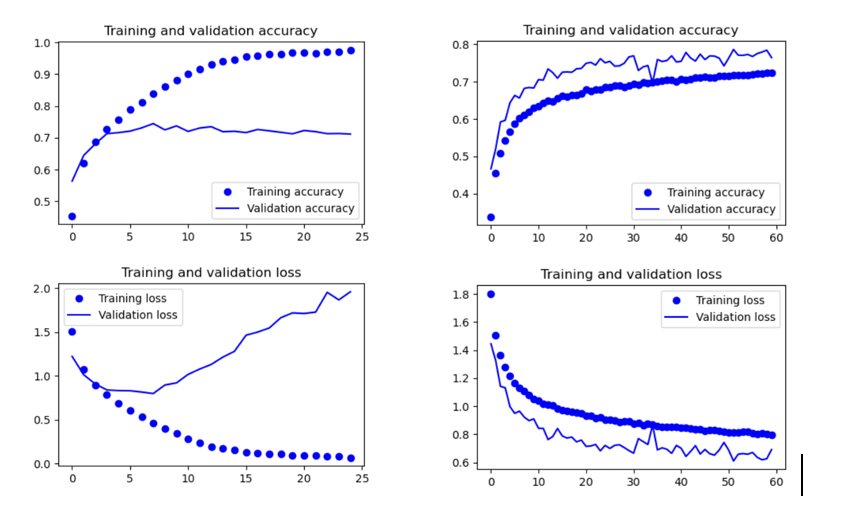

**Quantitative Analysis**

After applying regularization methods- 

- There is `reduction in loss from 1.95 to 0.71`
- There is `increase in accuracy from 0.71 to 0.75`